In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from itertools import product
%matplotlib inline

In [2]:
# Here we will import the data and load it to a dataframe
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
# Let's see our top 5 rows
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
# Summary of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


- Here we can see that our dataset contains 215 rows with 15 features asssociated with it.

In [5]:
# Checking for Null values in our Dataset
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

- Salary contains 67 NaN values in the dataset. We will replace all those NaN values in the next step.

In [6]:
# Rows whose Salary value is not present
df[df['salary'].isnull()]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.00,Central,55.00,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
14,15,M,62.00,Central,47.00,Central,Commerce,50.00,Comm&Mgmt,No,76.00,Mkt&HR,54.96,Not Placed,NaN
17,18,F,55.00,Central,67.00,Central,Commerce,64.00,Comm&Mgmt,No,60.00,Mkt&Fin,67.28,Not Placed,NaN
18,19,F,63.00,Central,66.00,Central,Commerce,64.00,Comm&Mgmt,No,68.00,Mkt&HR,64.08,Not Placed,NaN
25,26,F,52.58,Others,54.60,Central,Commerce,50.20,Comm&Mgmt,Yes,76.00,Mkt&Fin,65.33,Not Placed,NaN
29,30,M,62.00,Central,67.00,Central,Commerce,58.00,Comm&Mgmt,No,77.00,Mkt&Fin,51.29,Not Placed,NaN


In [7]:
# Let's replace those NaN value with 0
df['salary'] = df['salary'].fillna(0)

In [8]:
# Checking all the null values are removed
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

### Univariate Exploration:

#### Different Candidate count in Placement Drive:

In [9]:
# Let's check the different data of Gender column
df['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

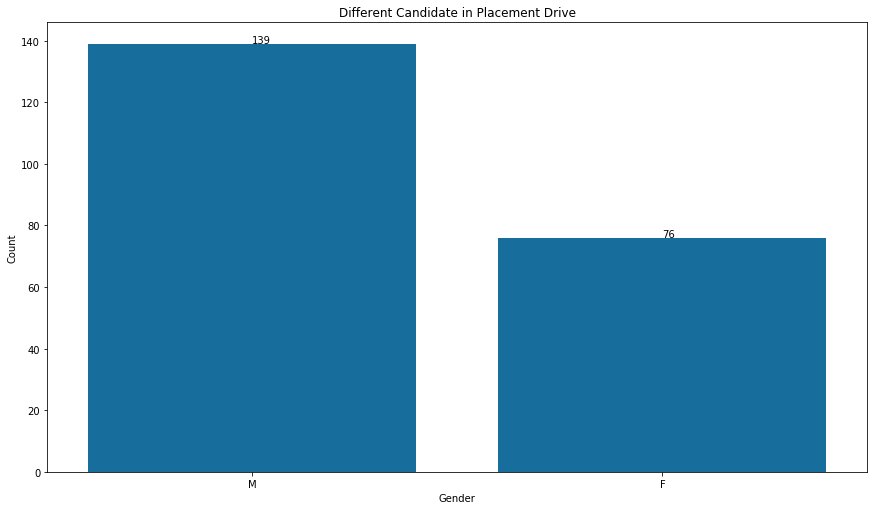

In [10]:
# Exploration of different Candidate
plt.figure(figsize = (14.7, 8.27))
viscolor = sb.color_palette('colorblind')[0]
ax = sb.countplot(data = df, x = 'gender', color = viscolor, order = df['gender'].value_counts().index)
plt.xlabel('Gender')
plt.ylabel('Count')
for i, v in df['gender'].value_counts().reset_index().iterrows():
    ax.text(i, v.gender + 0.2 , v.gender, color='black')
plt.title('Different Candidate in Placement Drive');

- We can see here that in the record of the placement drive there is more number of Male candidates than that of female candidates.

#### Education Specialization:

In [11]:
# Value of count of different Specialization
df['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

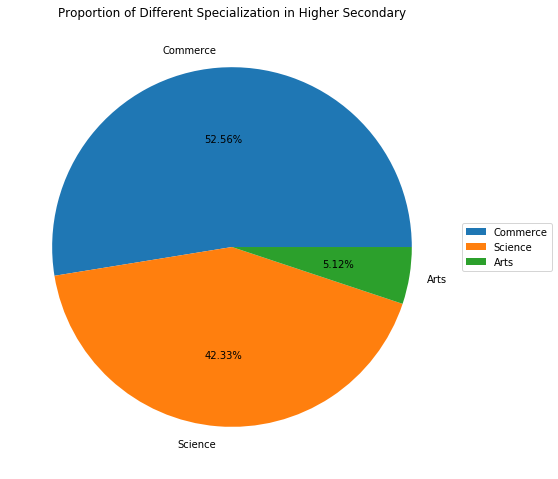

In [12]:
# Visualization of higher secondary specialization
cls_name = ['Commerce', 'Science', 'Arts']
fig, ax = plt.subplots(figsize = (14.7, 8.27))
wedges, text, autotext = ax.pie(df['hsc_s'].value_counts(), labels = cls_name, autopct = '%1.2f%%')
ax.legend(wedges, cls_name, loc = "center left", bbox_to_anchor =(1, 0, 0.5, 1))
ax.set_title("Proportion of Different Specialization in Higher Secondary");

- We can see that in placement drive more candidate are from Commerce and Science background. Less candidates are from Art's background means only 5.12%.

In [13]:
# Value count of Degree specialization
df['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [14]:
# Value count of Postgrad specialization
df['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

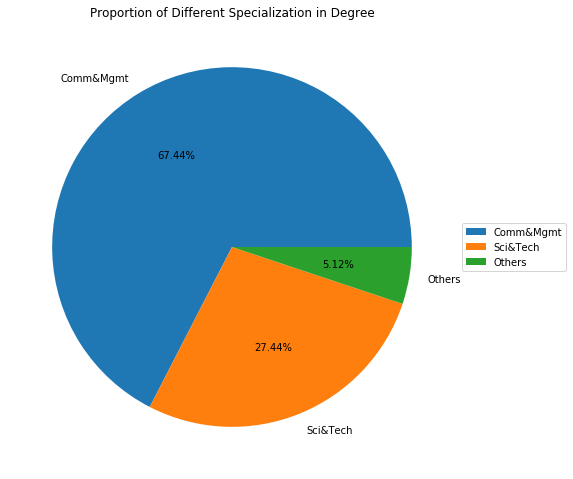

In [15]:
# Visualization of Degree Specialization
fig, ax = plt.subplots(figsize = (14.7, 8.27))
wedges, text, autotext = ax.pie(df['degree_t'].value_counts(),
                                labels = df['degree_t'].value_counts().index, 
                                autopct = '%1.2f%%')
ax.legend(wedges, df['degree_t'].value_counts().index,
          loc = "center left", bbox_to_anchor =(1, 0, 0.5, 1))
ax.set_title("Proportion of Different Specialization in Degree");

- Here we can see that more Candidate have Comm&Mgmt degree followed by Sci&Tech.

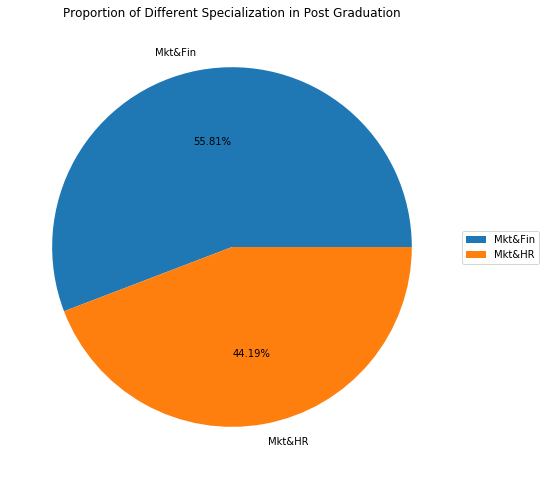

In [16]:
# Visualization of Postgrad Specialization
fig, ax = plt.subplots(figsize = (14.7, 8.27))
wedges, text, autotext = ax.pie(df['specialisation'].value_counts(),
                                labels = df['specialisation'].value_counts().index, 
                                autopct = '%1.2f%%')
ax.legend(wedges, df['specialisation'].value_counts().index,
          loc = "center left", bbox_to_anchor =(1, 0, 0.5, 1))
ax.set_title("Proportion of Different Specialization in Post Graduation");

- Here we can see that 55.81% belongs to Mkt&Fin postgraduation program. Other belongs to Mkt&HR background.

#### Creating Category of Mark Secured in Different Educational Phase:
- Here we will create 3 category:
    - 85% + 
    - 60% - 85%
    - < 60% 

In [17]:
# Defining a function which will be used to determine the above category.
# We will store that in a new category
def checkCateg(perct):
    if(perct >= 85):
        return '85% +'
    elif(perct < 85 and perct >= 60):
        return '60% - 85%'
    else:
        return '< 60%'

In [18]:
# Adding new columns in our dataframe with this category
df['ssc_p_catg'] = df['ssc_p'].apply(checkCateg)
df['hsc_p_catg'] = df['hsc_p'].apply(checkCateg)
df['mba_p_catg'] = df['mba_p'].apply(checkCateg)
df['degree_p_catg'] = df['degree_p'].apply(checkCateg)
df['etest_p_catg'] = df['etest_p'].apply(checkCateg)

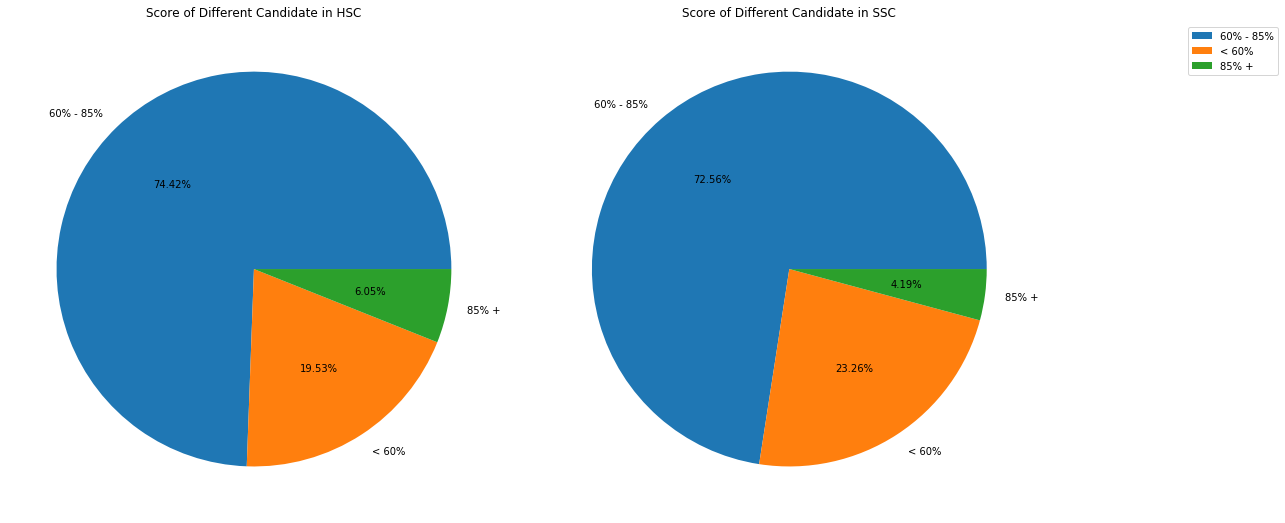

In [19]:
# Let's visualize what is proportion of different score in HSC and SSC
categ_cls = ['60% - 85%', '< 60%', '85% +']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14.70, 8.27))
wedges, text, autotext = ax1.pie(df['hsc_p_catg'].value_counts(),
                                 labels = df['hsc_p_catg'].value_counts().index,
                                 autopct = '%1.2f%%')
ax1.set_title("Score of Different Candidate in HSC");
plt.tight_layout()
wedges, text, autotext = ax2.pie(df['ssc_p_catg'].value_counts(),
                                 labels = df['ssc_p_catg'].value_counts().index,
                                 autopct = '%1.2f%%')
ax2.set_title("Score of Different Candidate in SSC");
ax2.legend(wedges, categ_cls,
           loc = "upper right", bbox_to_anchor =(1, 0, 0.5, 1));

##### Insights:
- We can see that in the placement drive more number of candidate belong to 60%-85% cateogry in HSC and SSC. Only 4 to 6% candidate belongs to 85% category in HSC and SSC.
- We will further visualize the other score and gain some insight.

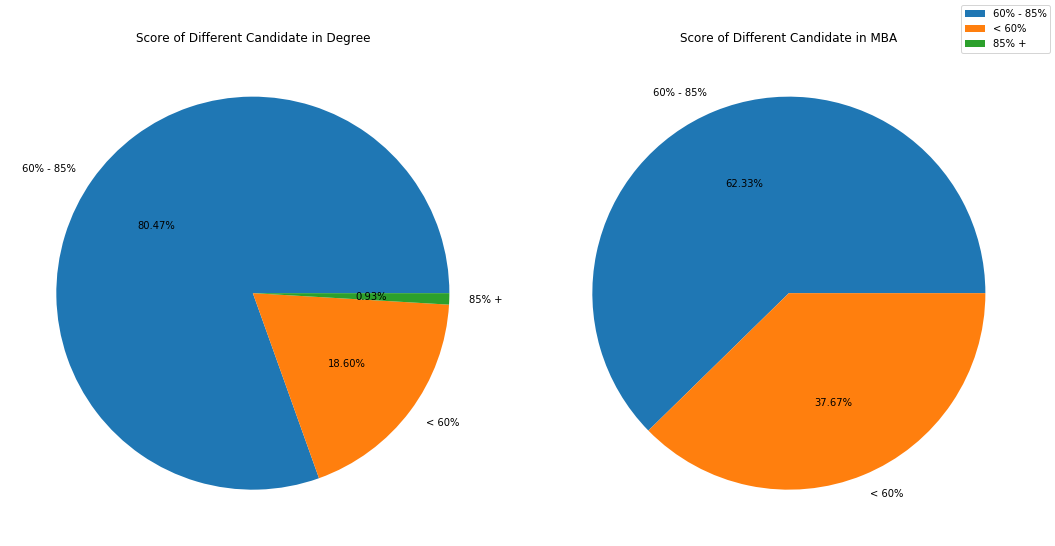

In [20]:
# Let's visualize what is proportion of different score in Degree and MBA
categ_cls = ['60% - 85%', '< 60%', '85% +']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14.70, 8.27))
wedges, text, autotext = ax1.pie(df['degree_p_catg'].value_counts(),
                                 labels = df['degree_p_catg'].value_counts().index,
                                 autopct = '%1.2f%%')
ax1.set_title("Score of Different Candidate in Degree");
plt.tight_layout()
wedges, text, autotext = ax2.pie(df['mba_p_catg'].value_counts(),
                                 labels = df['mba_p_catg'].value_counts().index,
                                 autopct = '%1.2f%%')
ax2.set_title("Score of Different Candidate in MBA");
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right');

- Here we can see the similar trend as previously. We can see more number of candidate belong to 60%-85% category.
- In Degree only 0.93% candidate belong to "85% +" category. In this placement drive No candidate have "85% +" in MBA.

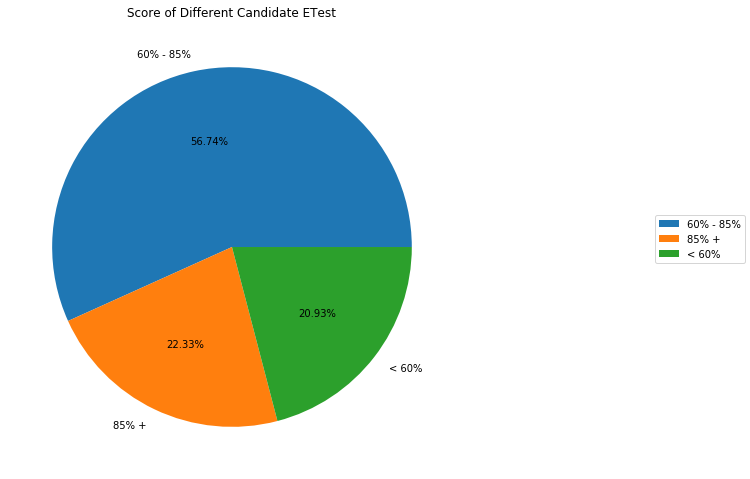

In [21]:
# Finally we will visualize Etest
fig, ax = plt.subplots(figsize =(14.70, 8.27))
wedges, text, autotext = ax.pie(df['etest_p_catg'].value_counts(),
                                labels = df['etest_p_catg'].value_counts().index,
                                autopct = '%1.2f%%')
ax.set_title("Score of Different Candidate ETest")
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels,loc = "right");

- In ETest we can observe the same trend as above. But we can see 22.33% candidate belong to 85% + category.

#### Visualization of Work Experience of Candidates in placement drive:

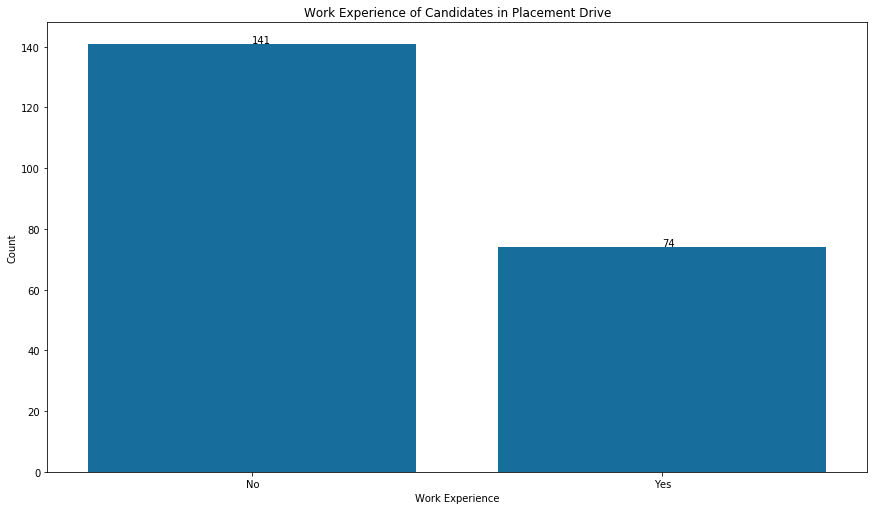

In [22]:
# Visualize of Work Experience
plt.figure(figsize = (14.7, 8.27))
ax = sb.countplot(data = df, x = 'workex', color = viscolor, order = df['workex'].value_counts().index)
plt.xlabel('Work Experience')
plt.ylabel('Count')
for i, v in df['workex'].value_counts().reset_index().iterrows():
    ax.text(i, v.workex + 0.2 , v.workex, color='black')
plt.title('Work Experience of Candidates in Placement Drive');

- We can see that more candidate has no work experience. 

#### Candidate Placement Status:

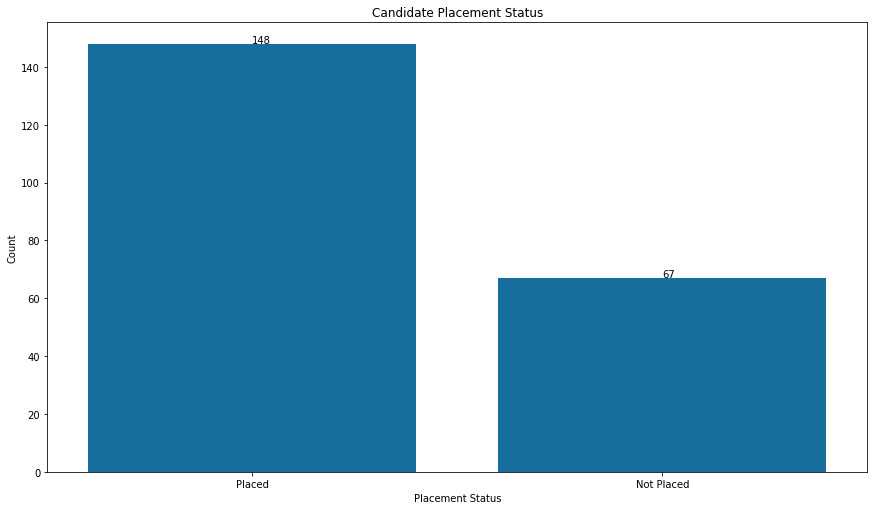

In [23]:
# Visualizing candidate placement status
plt.figure(figsize = (14.7, 8.27))
ax = sb.countplot(data = df, x = 'status', color = viscolor,
            order = df['status'].value_counts().index)
plt.xlabel('Placement Status')
plt.ylabel('Count')
for i, v in df['status'].value_counts().reset_index().iterrows():
    ax.text(i, v.status + 0.2 , v.status, color='black')
plt.title('Candidate Placement Status');

- Here we can see that more of the candidate are placed.

In the next exploration we will see the relation between two variable and gain some insights.

### Bivariate Exploration:

#### Placment Status of Different Candidate:

In [24]:
# defining a function which will show the frequency of the bar in the countplot
def withhue(ax, feature, nooffeature, huecategories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(nooffeature):
        total = df[feature].value_counts().values[i]
        for j in range(huecategories):
            percentage = '{:.1f}%'.format(100 * a[(j*nooffeature + i)]/total)
            x = patch[(j*nooffeature + i)].get_x() + patch[(j*nooffeature + i)].get_width() / 2 - 0.15
            y = patch[(j*nooffeature + i)].get_y() + patch[(j*nooffeature + i)].get_height()
            ax.annotate(percentage, (x, y), size = 12, ha='center', va='bottom')
    plt.show()

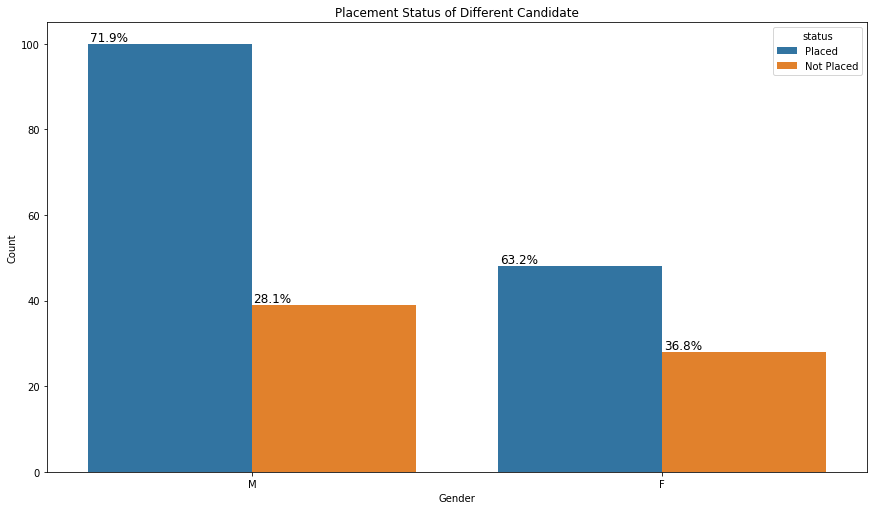

In [25]:
# Visualization of placement status of different candidate based on gender
plt.figure(figsize = (14.7, 8.27))
ax = sb.countplot(data = df, x = 'gender', hue = 'status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Placement Status of Different Candidate');
withhue(ax, 'gender', 2, 2)

- Here we can see that more number of Male candidates are placed than that of the female candidates. Also, more number of Male candidates are not placed as compared to female candidate.

#### Work Experience of Different Candidate:

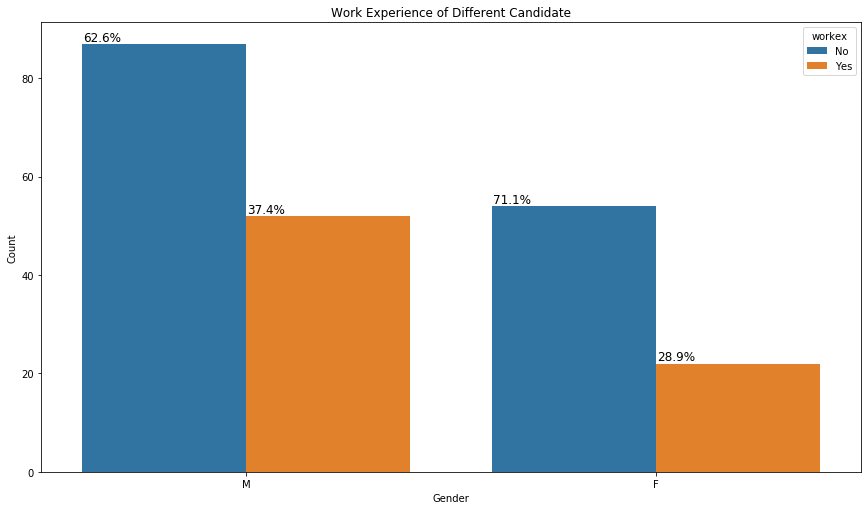

In [26]:
# Visualization of Work experience of different candidate
plt.figure(figsize = (14.7, 8.27))
ax = sb.countplot(data = df, x = 'gender', hue = 'workex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Work Experience of Different Candidate');
withhue(ax, 'gender', 2, 2)

- Proportion of No workexperience is more for both male and female candidate.

#### MBA Specialisation of Different Candidate:

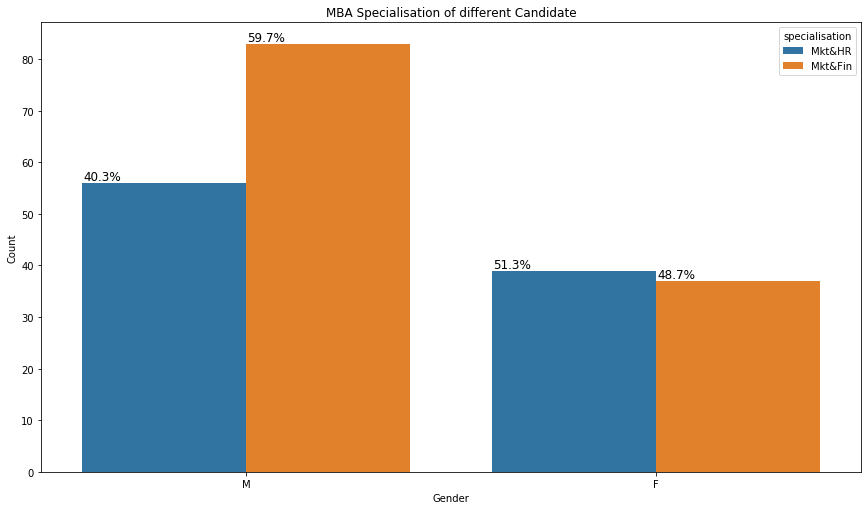

In [27]:
# Visualisation of MBA specialisation of different candidate:
plt.figure(figsize = (14.7, 8.27))
ax = sb.countplot(data = df, x = 'gender', hue = 'specialisation')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('MBA Specialisation of different Candidate');
withhue(ax, 'gender', 2, 2)

- Male candidate have more number of Mkt&Fn specialisation where as Female candidates have more number of Mkt&HR specialisation.

#### Salary of Different Candidate with WorkExperience:

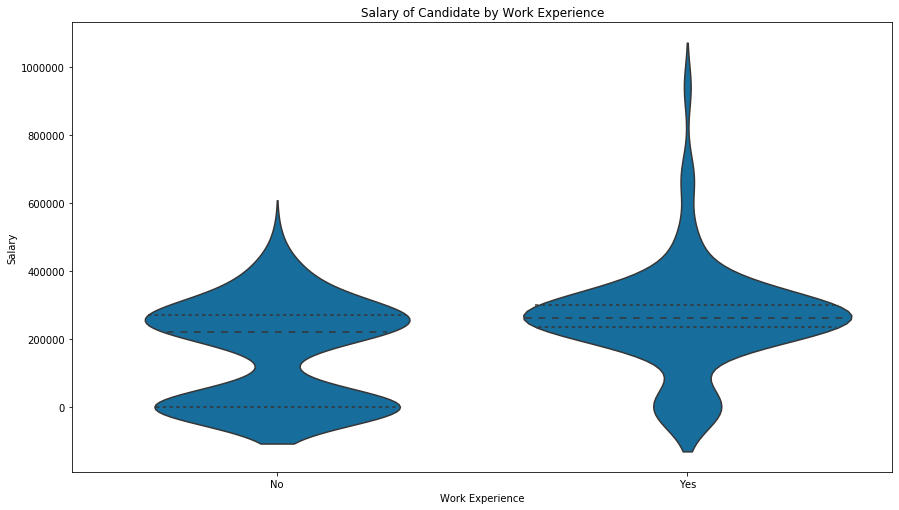

In [28]:
# Visualisation of Salary of Different Candidate with WorkExperience
plt.figure(figsize = (14.7, 8.27))
sb.violinplot(data = df, x = 'workex', y = 'salary', color = viscolor, inner = 'quartile')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary of Candidate by Work Experience');

- Candidate with work experience is getting more salary than that of the candidate having no experience.

#### HSC Percentage of different HSC Board:

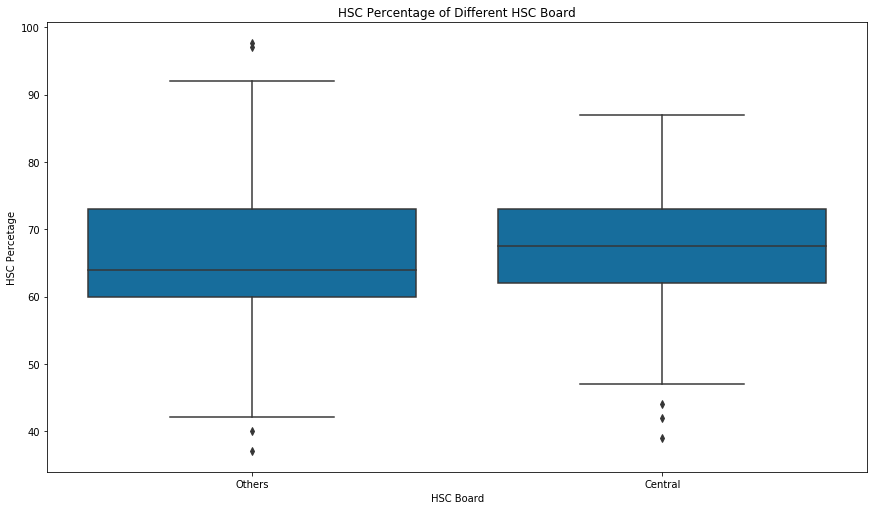

In [29]:
# Visualization of HSC percentage distribution of different HSC Board
plt.figure(figsize = (14.7, 8.27))
sb.boxplot(data = df, x = 'hsc_b', y = 'hsc_p', color = viscolor)
plt.xlabel('HSC Board')
plt.ylabel('HSC Percetage')
plt.title('HSC Percentage of Different HSC Board');

- Central board candidate has better median score than that of Other boards. But we can see that Other board candiate has higher score range than that of the central board.

### Multivariate Exploration:

#### Placement status of different candidate by MBA and Degree:

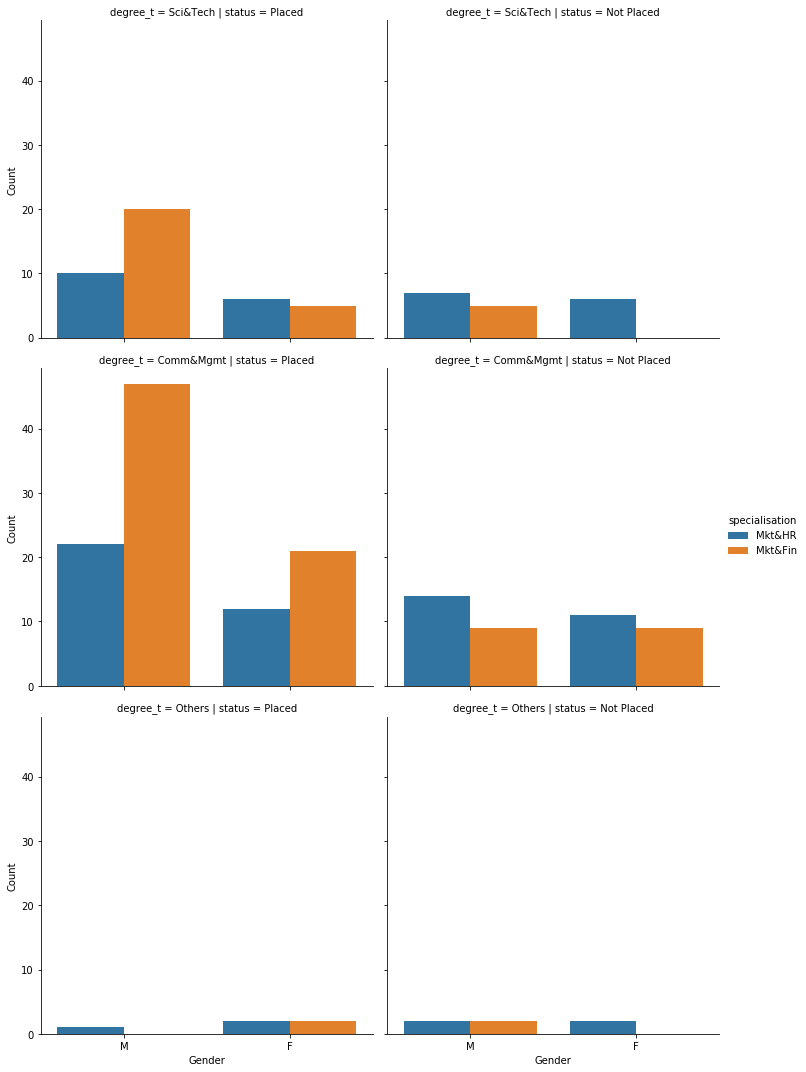

In [30]:
g = sb.catplot(kind = 'count', data = df, x = 'gender',
               hue = 'specialisation', col = 'status', row = 'degree_t');
g.set_axis_labels('Gender', 'Count');

- Candidates having Comm&Mgmt degree and Mkt&Fin specialisation are placed in more number than that of Mkt&HR specialisation.

#### Placement Status of Different Degree holders with Specialisation:

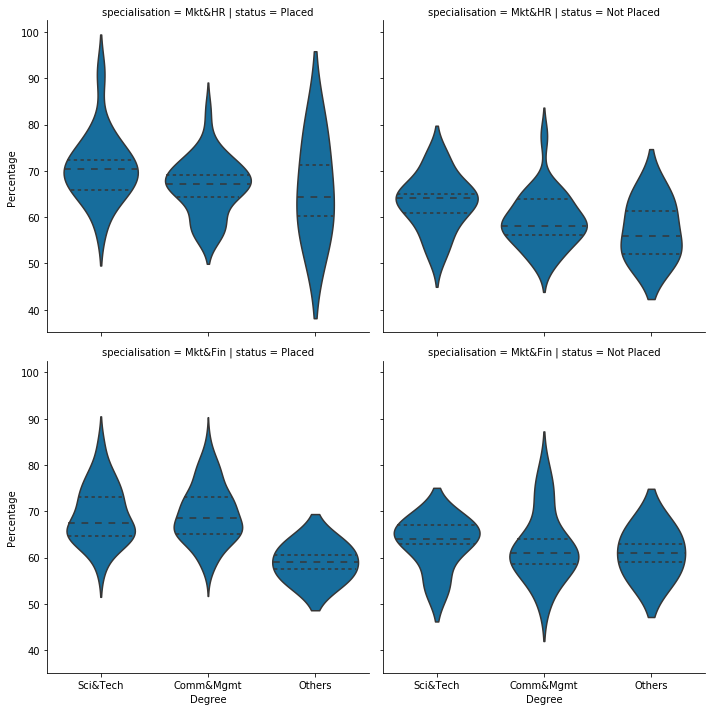

In [31]:
# Visualisation of Placement status of different degree holders
g = sb.catplot(kind = 'violin', data = df, x = 'degree_t', y = 'degree_p' , col = 'status',
              inner = 'quartile', color = viscolor, row = 'specialisation');
g.set_axis_labels('Degree', 'Percentage');

- Having higher percentage gives more chance of placement.

#### Salary of Different Candidates with Degree and Specialisation:

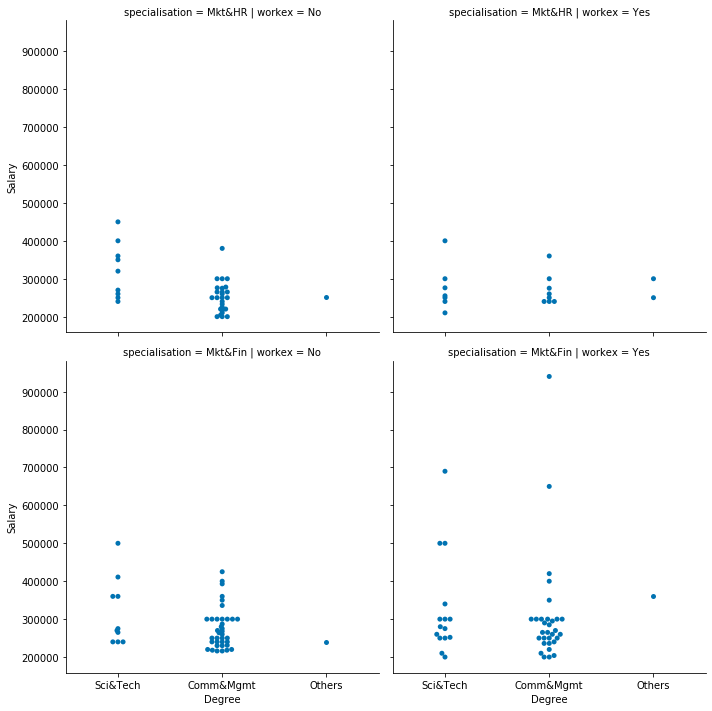

In [32]:
g = sb.catplot(kind = 'swarm', data = df.query('status == "Placed"'), x = 'degree_t', y = 'salary',
              color = viscolor, row = 'specialisation', col = 'workex');
g.set_axis_labels('Degree', 'Salary');

- Here we can see that salary of different degree holders having Mkt&Fin specialisation is getting more salary than that of the Mkt&HR.

#### Job offers by Educational Qualification:

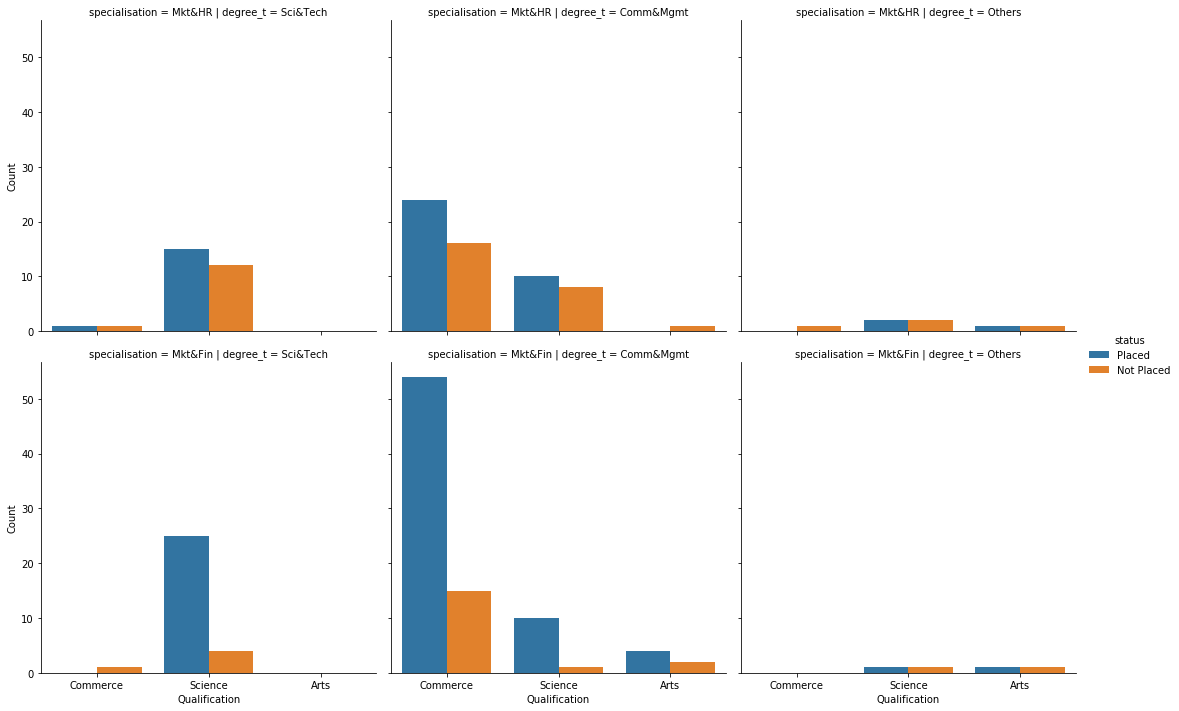

In [33]:
g = sb.catplot(kind = 'count', data = df, x = 'hsc_s',
               hue = 'status', col = 'degree_t', row = 'specialisation');
g.set_axis_labels('Qualification', 'Count');

- We can see every sort of degree holders has received jobs. But Those who have Commerce background and has a degree in Comm&Mgmt and MBA Specialisation in Mkt&Fn, Mkt&HR are more likely to be placed followed by Science background with Sci&Tech degree with Mkt&Fn, Mkt&HR specialisation.

#### Insights:
- By analyzing the data we saw that more number of Commerece background candidate are placed followed by Science background candidates.
- Mkt&Fn MBA specialization candidates are placed in more numbers followed by Mkt&HR specialisation.
- Work experience is your bonus point. Candidate having work experience are more likely to get a good salary package.
- Scoring good percentage/score throughout the career may help candidate secure a job.

### Classification of Placement Status & Prediction of Salary using Different Attribute:
As we have gained some insights about the attributes helping a candidate secure a job and a good package. So, first using these attribute we will classify if a candidate is going to secure a job or not; then we are going to follow Regression mechanism to predict the package that a candidate might get.

#### Label Encoding & Feature Scaling:
- There are different features that needed to be scaled before used in a model. So do different categorical variables which need to be encoded.
###### Reference:
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [34]:
# Label encoding
le = LabelEncoder()
df[['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']] = df[['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']].apply(le.fit_transform)

In [35]:
# Checking the Encoded values
df.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,ssc_p_catg,hsc_p_catg,mba_p_catg,degree_p_catg,etest_p_catg
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.00,1,58.80,1,270000.0,60% - 85%,85% +,< 60%,< 60%,< 60%
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.50,0,66.28,1,200000.0,60% - 85%,60% - 85%,60% - 85%,60% - 85%,85% +
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.00,0,57.80,1,250000.0,60% - 85%,60% - 85%,< 60%,60% - 85%,60% - 85%
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.00,1,59.43,0,0.0,< 60%,< 60%,< 60%,< 60%,60% - 85%
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.80,0,55.50,1,425000.0,85% +,60% - 85%,< 60%,60% - 85%,85% +
5,6,1,55.00,1,49.80,1,2,67.25,2,1,55.00,0,51.58,0,0.0,< 60%,< 60%,< 60%,60% - 85%,< 60%
6,7,0,46.00,1,49.20,1,1,79.00,0,0,74.28,0,53.29,0,0.0,< 60%,< 60%,< 60%,60% - 85%,60% - 85%
7,8,1,82.00,0,64.00,0,2,66.00,2,1,67.00,0,62.14,1,252000.0,60% - 85%,60% - 85%,60% - 85%,60% - 85%,60% - 85%
8,9,1,73.00,0,79.00,0,1,72.00,0,0,91.34,0,61.29,1,231000.0,60% - 85%,60% - 85%,60% - 85%,60% - 85%,85% +
9,10,1,58.00,0,70.00,0,1,61.00,0,0,54.00,0,52.21,0,0.0,< 60%,60% - 85%,< 60%,60% - 85%,< 60%


In [36]:
# Feature Scaling
scaler = StandardScaler()
df[['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']] = scaler.fit_transform(df[['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']])

In [37]:
# Checking Scaled features
df.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,ssc_p_catg,hsc_p_catg,mba_p_catg,degree_p_catg,etest_p_catg
0,1,1,-0.028087,1,2.268812,1,1,-1.140102,2,0,-1.291091,1,-0.597647,1,0.461711,60% - 85%,85% +,< 60%,< 60%,< 60%
1,2,1,1.113369,0,1.103448,1,2,1.513267,2,1,1.087157,0,0.687620,1,0.008404,60% - 85%,60% - 85%,60% - 85%,60% - 85%,85% +
2,3,1,-0.213238,0,0.153313,0,0,-0.322843,0,0,0.218908,0,-0.769474,1,0.332195,60% - 85%,60% - 85%,< 60%,60% - 85%,60% - 85%
3,4,1,-1.046417,0,-1.318339,0,2,-1.957362,2,0,-0.460592,1,-0.489396,0,-1.286761,< 60%,< 60%,< 60%,< 60%,60% - 85%
4,5,1,1.712332,0,0.668391,0,1,0.943909,0,0,1.864806,0,-1.164676,1,1.465463,85% +,60% - 85%,< 60%,60% - 85%,85% +
5,6,1,-1.138993,1,-1.520691,1,2,0.119839,2,1,-1.291091,0,-1.838239,0,-1.286761,< 60%,< 60%,< 60%,60% - 85%,< 60%
6,7,0,-1.972172,1,-1.575878,1,1,1.720306,0,0,0.164548,0,-1.544414,0,-1.286761,< 60%,< 60%,< 60%,60% - 85%,60% - 85%
7,8,1,1.360545,0,-0.214600,0,2,-0.050423,2,1,-0.385092,0,-0.023744,1,0.345146,60% - 85%,60% - 85%,60% - 85%,60% - 85%,60% - 85%
8,9,1,0.527366,0,1.165073,0,1,0.766836,0,0,1.452576,0,-0.169797,1,0.209154,60% - 85%,60% - 85%,60% - 85%,60% - 85%,85% +
9,10,1,-0.861266,0,0.337269,0,1,-0.731473,0,0,-1.366591,0,-1.729988,0,-1.286761,< 60%,60% - 85%,< 60%,60% - 85%,< 60%


In [38]:
# Separating Features for classification
X = df.iloc[:,1:13]
y = df.iloc[:, 13]

In [39]:
# Creating Training and Test data for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [40]:
# Recall, Precision, Accuracy List which will be further used in Plotting
recall_l, precision_l, accuracy_l = [], [], []

In [41]:
# Defining a Function to get the accuracy of different classifiers
def get_accuracy(y_test, y_pred):
    matrix = confusion_matrix(y_test,y_pred)
    TP = matrix[1][1]
    TN = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    # calculate the Recall
    recall = TP / (TP + FN)    
    # calculate the Precision
    precision = TP / (TP + FP)
    recall_l.append(recall)
    precision_l.append(precision)
    accuracy_l.append(accuracy_score(y_test, y_pred))
    return recall, precision, accuracy_score(y_test, y_pred)

In [42]:
# Decision Tree Classifier
df_clf = DecisionTreeClassifier(random_state = 0)
df_clf.fit(X_train, y_train)
y_pred = df_clf.predict(X_test)
recall, precision, accuracy = get_accuracy(y_test, y_pred)
print('================================')
print('Classifier: Decision Tree')
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy)

Classifier: Decision Tree
Recall    :  0.9333333333333333
Precision :  0.8484848484848485
Accuracy  :  0.8372093023255814


In [43]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators = 50, random_state = 0, criterion = 'entropy')
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
recall, precision, accuracy = get_accuracy(y_test, y_pred)
print('================================')
print('Classifier: Random Forest')
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy) 

Classifier: Random Forest
Recall    :  0.9
Precision :  0.8181818181818182
Accuracy  :  0.7906976744186046


In [44]:
# Logistic Regression
lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
recall, precision, accuracy = get_accuracy(y_test, y_pred)
print('================================')
print('Classifier: Logistic Regression')
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy) 

Classifier: Logistic Regression
Recall    :  0.9
Precision :  0.9
Accuracy  :  0.8604651162790697


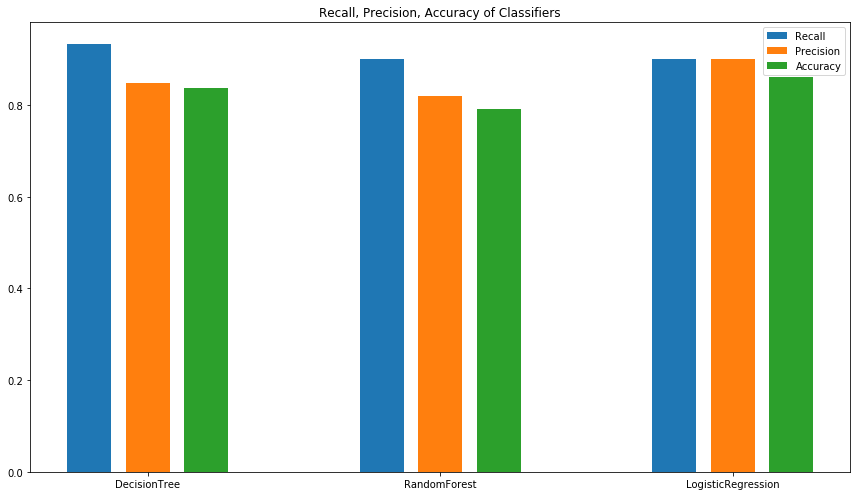

In [45]:
# Plotting Recall, Precision, Accuracy of classifier
x = ['DecisionTree', 'RandomForest', 'LogisticRegression']
x_axis = np.arange(len(x))
plt.figure(figsize = [14.70, 8.27])
plt.bar(x_axis - 0.2, recall_l, 0.15, label = 'Recall')
plt.bar(x_axis, precision_l, 0.15, label = 'Precision')
plt.bar(x_axis + 0.2, accuracy_l, 0.15, label = 'Accuracy')
plt.xticks(x_axis, x)
plt.legend()
plt.title('Recall, Precision, Accuracy of Classifiers');

In [46]:
# Preparing the data for our Regression model
X = df.iloc[:,1:14]
y = df.iloc[:, 14]

In [47]:
# Creating Training and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

In [48]:
# Root Mean Squared Error List for Regressor
rmse = []

In [49]:
# Random Forest Regression
regressor_rf = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor_rf.fit(X_train, y_train)
y_test = regressor_rf.predict(X_test)
print('==============================')
print('Regression Model      : RandomForest')
print('RMSE                  : ', np.sqrt(mean_squared_error(y_test, y_pred)))
rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

Regression Model      : RandomForest
RMSE                  :  1.2469498958389158


In [50]:
# Decision Tree Regressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)
y_test = regressor_dt.predict(X_test)
print('==============================')
print('Regression Model      : DecisionTree')
print('RMSE                  : ', np.sqrt(mean_squared_error(y_test, y_pred)))
rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

Regression Model      : DecisionTree
RMSE                  :  1.2748427830492495


In [51]:
# Linear Regression
regressor_lr = LinearRegression()
regressor_lr.fit(X_train, y_train)
y_test = regressor_lr.predict(X_test)
print('==============================')
print('Regression Model      : Linear')
print('RMSE                  : ', np.sqrt(mean_squared_error(y_test, y_pred)))
rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

Regression Model      : Linear
RMSE                  :  1.2291021561406164


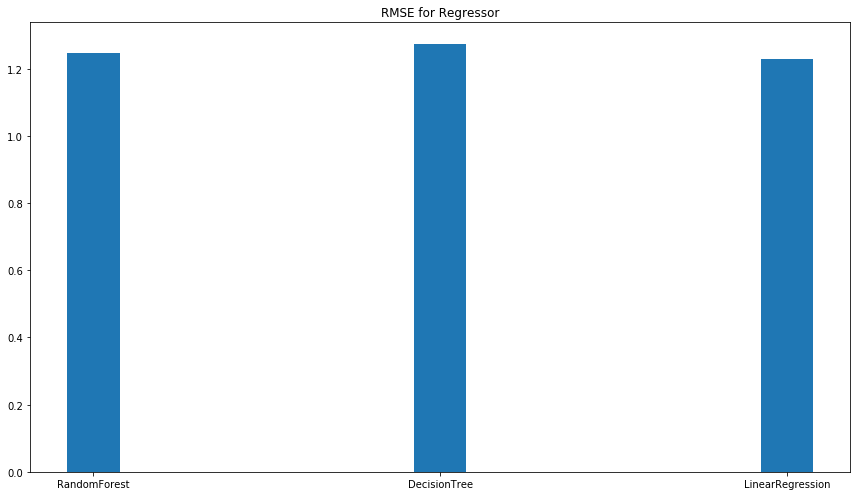

In [52]:
# Plotting RMSE
x = ['RandomForest', 'DecisionTree', 'LinearRegression']
x_axis = np.arange(len(x))
plt.figure(figsize = (14.7, 8.27))
plt.bar(x_axis, rmse, 0.15, label = 'RMSE')
plt.xticks(x_axis, x)
plt.title('RMSE for Regressor');